<a href="https://colab.research.google.com/github/SnehaPandey-1720/Ds-Da-learning-hub/blob/main/DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

**Objective:**
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

## Task 1:	Handle missing values as per the best practices (imputation, removal, etc.).
-   Apply scaling techniques to numerical features:
   >a.	Standard Scaling; b. Min-Max Scaling
-   Discuss the scenarios where each scaling technique is preferred and why.

In [ ]:
# pandas, numpy - data manipulation
# matplotlib, seaborn - visualization
# sklearn - preprocessing, encoding, feature selection, etc.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("adult_with_headers.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("\nPreview of dataset:")
df.head()

✅ Dataset Loaded Successfully!
Shape of dataset: (32561, 15)

Preview of dataset:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Basic EDA
print("\nData Information:")
print(df.info())

print("\nSummary statistics of numerical features:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary statistics of numerical features:
                age       

In [ ]:
# We impute (fill) missing categorical data with the most frequent category
# For numerical, median imputation is often robust to outliers

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=np.number).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df[num_cols] = num_imputer.fit_transform(df[num_cols])

## Task 2: Encoding Techniques

-	Apply One-Hot Encoding to categorical variables with less than 5 categories.
-	Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
-	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
-	les with more than 5 categories.
-	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [ ]:
# One-Hot Encoding -> for features with < 5 categories (nominal)
# Label Encoding -> for features with >= 5 categories (high cardinality)

onehot_cols = [col for col in cat_cols if df[col].nunique() < 5]
label_cols = [col for col in cat_cols if df[col].nunique() >= 5]

# One-Hot Encoding
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Label Encoding
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("\n✅ Encoding Completed!")
print("One-Hot Encoded columns:", onehot_cols)
print("Label Encoded columns:", label_cols)
df1


✅ Encoding Completed!
One-Hot Encoded columns: ['sex', 'income']
Label Encoded columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,False,False
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,True,True
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,False,False
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,True,False


**Note:**
1. One-Hot Encoding → expands categories into binary columns (good for tree models, non-ordinal data)
2. Label Encoding → assigns numbers to each category (used when there are many unique categories)

## Task 3: Feature Engineering

-	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
-	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [ ]:
# Feature Engineering

# 1️⃣ Create new feature: 'capital_net' = capital-gain - capital-loss
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# 2️⃣ Age group bins (categorical)
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 25, 45, 65, 120],
                         labels=['Young', 'Adult', 'Mid_Senior', 'Senior'])

# 3️⃣ Feature: hours_per_age ratio
df['hours_per_age'] = df['hours_per_week'] / (df['age'] + 1e-6)

# --- Log Transformation ---
# For skewed features like 'capital_gain', we apply log1p transformation
df['capital_gain_log'] = np.log1p(df2['capital_gain'])

print("\n Feature Engineering Completed!")
print(df[['capital_net', 'age_group', 'hours_per_age', 'capital_gain_log']].head())


 Feature Engineering Completed!
   capital_net   age_group  hours_per_age  capital_gain_log
0       2174.0       Adult       1.025641          7.684784
1          0.0  Mid_Senior       0.260000          0.000000
2          0.0       Adult       1.052632          0.000000
3          0.0  Mid_Senior       0.754717          0.000000
4          0.0       Adult       1.428571          0.000000


🔍 Why we add + 1e-6 in hours_per_age ratio :
1. To avoid division by zero

If any value of age is 0 (or missing and got imputed as 0),
then dividing by 0 would cause an error or result in infinity (∞).

By adding 1e-6, we make sure:

![image.png](attachment:5bf947dd-2546-404f-8bde-0e8e6b5d0953.png)

So the denominator is never zero, keeping the calculation stable.

2. For numerical precision

Computers represent decimals in floating-point form, which can introduce small rounding errors.
Adding 1e-6 keeps calculations from blowing up or returning “NaN” (Not a Number) in rare edge cases.

3. Theoretical impact on the data

Adding
0.000001
0.000001 to a value like 25, 45, or 65 changes it so little that it doesn’t affect the meaning of the data — it’s only for computational safety.

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_net,2age_group,hours_per_age,capital_gain_log,age_group
0,39.0,7,77516.0,9,13.0,4,1,1,4,2174.0,0.0,40.0,39,True,False,2174.0,Adult,1.025641,7.684784,Adult
1,50.0,6,83311.0,9,13.0,2,4,0,4,0.0,0.0,13.0,39,True,False,0.0,Mid_Senior,0.260000,0.000000,Mid_Senior
2,38.0,4,215646.0,11,9.0,0,6,1,4,0.0,0.0,40.0,39,True,False,0.0,Adult,1.052632,0.000000,Adult
3,53.0,4,234721.0,1,7.0,2,6,0,2,0.0,0.0,40.0,39,True,False,0.0,Mid_Senior,0.754717,0.000000,Mid_Senior
4,28.0,4,338409.0,9,13.0,2,10,5,2,0.0,0.0,40.0,5,False,False,0.0,Adult,1.428571,0.000000,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,257302.0,7,12.0,2,13,5,4,0.0,0.0,38.0,39,False,False,0.0,Adult,1.407407,0.000000,Adult
32557,40.0,4,154374.0,11,9.0,2,7,0,4,0.0,0.0,40.0,39,True,True,0.0,Adult,1.000000,0.000000,Adult
32558,58.0,4,151910.0,11,9.0,6,1,4,4,0.0,0.0,40.0,39,False,False,0.0,Mid_Senior,0.689655,0.000000,Mid_Senior
32559,22.0,4,201490.0,11,9.0,4,1,3,4,0.0,0.0,20.0,39,True,False,0.0,Young,0.909091,0.000000,Young


In [ ]:
# Scaling
# StandardScaler → mean=0, std=1 (good for algorithms assuming Gaussian distribution)
# MinMaxScaler → scales values to [0,1] (good for bounded activations like neural nets)

scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

num_features = df.select_dtypes(include=np.number).columns

df3_std = df3.copy()
df3_mm = df3.copy()

df3_std[num_features] = scaler_std.fit_transform(df3_std[num_features])
df3_mm[num_features] = scaler_mm.fit_transform(df3_mm[num_features])

print("\n✅ Scaling Done!")
print("\nStandard Scaled sample:\n", df3_std[num_features].head())
print("\nMinMax Scaled sample:\n", df3_mm[num_features].head())



✅ Scaling Done!

Standard Scaled sample:
         age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030671   2.150579 -1.063611  -0.335437       1.134739        0.921634   
1  0.837109   1.463736 -1.008707  -0.335437       1.134739       -0.406212   
2 -0.042642   0.090050  0.245079   0.181332      -0.420060       -1.734058   
3  1.057047   0.090050  0.425801  -2.402511      -1.197459       -0.406212   
4 -0.775768   0.090050  1.408176  -0.335437       1.134739       -0.406212   

   occupation  relationship      race  capital_gain  capital_loss  \
0   -1.317809     -0.277805  0.393668      0.148453      -0.21666   
1   -0.608387     -0.900181  0.393668     -0.145920      -0.21666   
2   -0.135438     -0.277805  0.393668     -0.145920      -0.21666   
3   -0.135438     -0.900181 -1.962621     -0.145920      -0.21666   
4    0.810458      2.211698 -1.962621     -0.145920      -0.21666   

   hours_per_week  native_country  capital_net  hours_per_age  \
0       

In [ ]:
# Outlier Detection (Isolation Forest)
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_pred = iso.fit_predict(df[num_features])

df['is_outlier'] = np.where(outlier_pred == -1, 1, 0)
print("\nNumber of detected outliers:", df['is_outlier'].sum())


Number of detected outliers: 326


In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,hours_per_week,native_country,sex_ Male,income_ >50K,capital_net,2age_group,hours_per_age,capital_gain_log,age_group,is_outlier
0,39.0,7,77516.0,9,13.0,4,1,1,4,2174.0,...,40.0,39,True,False,2174.0,Adult,1.025641,7.684784,Adult,0
1,50.0,6,83311.0,9,13.0,2,4,0,4,0.0,...,13.0,39,True,False,0.0,Mid_Senior,0.260000,0.000000,Mid_Senior,0
2,38.0,4,215646.0,11,9.0,0,6,1,4,0.0,...,40.0,39,True,False,0.0,Adult,1.052632,0.000000,Adult,0
3,53.0,4,234721.0,1,7.0,2,6,0,2,0.0,...,40.0,39,True,False,0.0,Mid_Senior,0.754717,0.000000,Mid_Senior,0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0.0,...,40.0,5,False,False,0.0,Adult,1.428571,0.000000,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,257302.0,7,12.0,2,13,5,4,0.0,...,38.0,39,False,False,0.0,Adult,1.407407,0.000000,Adult,0
32557,40.0,4,154374.0,11,9.0,2,7,0,4,0.0,...,40.0,39,True,True,0.0,Adult,1.000000,0.000000,Adult,0
32558,58.0,4,151910.0,11,9.0,6,1,4,4,0.0,...,40.0,39,False,False,0.0,Mid_Senior,0.689655,0.000000,Mid_Senior,0
32559,22.0,4,201490.0,11,9.0,4,1,3,4,0.0,...,20.0,39,True,False,0.0,Young,0.909091,0.000000,Young,0


In [ ]:
# Using Mutual Information as PPS alternative
X = df.drop(columns=[ 'is_outlier'])
y = df['income_ >50K']

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

print("\nTop 10 important features (Mutual Information):")
print(mi_df.head(10))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

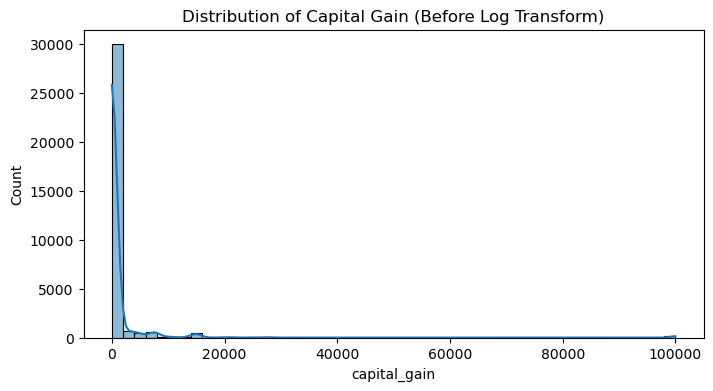

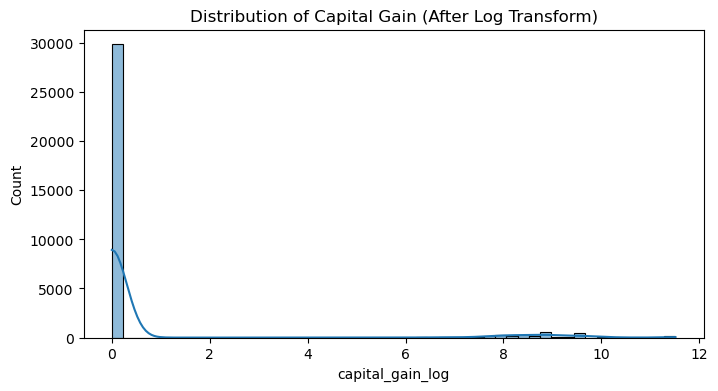

In [ ]:
# Visualization (Optional)
plt.figure(figsize=(8, 4))
sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.title("Distribution of Capital Gain (Before Log Transform)")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['capital_gain_log'], bins=50, kde=True)
plt.title("Distribution of Capital Gain (After Log Transform)")
plt.show()